# Conway's Game of Life

## Installation

You will need Python 3.10 or later, and a working JAX installation. For example, you can install JAX with:

In [ ]:
%pip install -U "jax[cuda12]"

Then, install CAX from PyPi:

In [ ]:
%pip install -U "cax[examples]"

## Import

In [1]:
import jax
import jax.numpy as jnp
import mediapy
from cax.core.ca import CA
from cax.core.perceive.conv_perceive import ConvPerceive
from cax.core.perceive.kernels import identity_kernel, neighbors_kernel
from cax.core.update.life_update import LifeUpdate
from flax import nnx

## Configuration

In [2]:
seed = 0

spatial_dims = (32, 32)
channel_size = 1

num_steps = 128

key = jax.random.key(seed)
rngs = nnx.Rngs(seed)

## Init state

In [3]:
def init_state():
	state = jnp.zeros((*spatial_dims, channel_size))

	mid_x, mid_y = spatial_dims[0] // 2, spatial_dims[1] // 2
	glider = jnp.array(
		[
			[0.0, 1.0, 0.0],
			[0.0, 0.0, 1.0],
			[1.0, 1.0, 1.0],
		]
	)
	return state.at[mid_x : mid_x + 3, mid_y : mid_y + 3, 0].set(glider)

## Model

In [4]:
perceive = ConvPerceive(
	channel_size=channel_size,
	perception_size=2 * channel_size,
	rngs=rngs,
	padding="CIRCULAR",
	feature_group_count=channel_size,
)
update = LifeUpdate()

In [5]:
kernel = jnp.concatenate([identity_kernel(2), neighbors_kernel(2)], axis=-1)
kernel = jnp.expand_dims(kernel, axis=-2)
perceive.conv.kernel = nnx.Param(kernel)

In [6]:
ca = CA(perceive, update)

## Visualize

In [ ]:
state = init_state()

state = ca(state, num_steps=num_steps, all_steps=True)

""

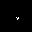

In [10]:
mediapy.show_video(jnp.squeeze(state), width=256, height=256, codec="gif")